In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = 'D:\Projetos\Analytics\huricanes\data\hurricanes.csv'
df_huricane = pd.read_csv(path)

In [3]:
df_huricane.head()

,Month,"""Average""","""2005""","""2006""","""2007""","""2008""","""2009""","""2010""","""2011""","""2012""","""2013""","""2014""","""2015"""
0,May,0.1,0,0,1,1,0,0,0,2,0,0,0
1,Jun,0.5,2,1,1,0,0,1,1,2,2,0,1
2,Jul,0.7,5,1,1,2,0,1,3,0,2,2,1
3,Aug,2.3,6,3,2,4,4,4,7,8,2,2,3
4,Sep,3.5,6,4,7,4,2,8,5,2,5,2,5


In [4]:
df_huricane.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Month       8 non-null      object 
 1    "Average"  8 non-null      float64
 2    "2005"     8 non-null      int64  
 3    "2006"     8 non-null      int64  
 4    "2007"     8 non-null      int64  
 5    "2008"     8 non-null      int64  
 6    "2009"     8 non-null      int64  
 7    "2010"     8 non-null      int64  
 8    "2011"     8 non-null      int64  
 9    "2012"     8 non-null      int64  
 10   "2013"     8 non-null      int64  
 11   "2014"     8 non-null      int64  
 12   "2015"     8 non-null      int64  
dtypes: float64(1), int64(11), object(1)
memory usage: 964.0+ bytes


In [5]:
df_huricane['Total'] = df_huricane.iloc[:, 2:].sum(axis=1)

In [6]:
# remover espaços em branco no df
df_huricane.columns = df_huricane.columns.str.strip()

In [7]:
rename_dict = {'"Average"': 'Average',
               '"2005"': '2005',
               '"2006"': '2006',
               '"2007"': '2007',
               '"2008"': '2008',
               '"2009"': '2009',
               '"2010"': '2010',
               '"2011"': '2011',
               '"2012"': '2012',
               '"2013"': '2013',
               '"2014"': '2014',
               '"2015"': '2015'
               }

# tentativa de automatização 
#rename_dict.update({f"{str(year)}": f'ano_{year}' for year in range(2005, 2016)})

df_huricane.rename(columns=rename_dict, inplace=True)
print(df_huricane)


  Month  Average  2005  2006  2007  2008  2009  2010  2011  2012  2013  2014  \
0   May      0.1     0     0     1     1     0     0     0     2     0     0   
1   Jun      0.5     2     1     1     0     0     1     1     2     2     0   
2   Jul      0.7     5     1     1     2     0     1     3     0     2     2   
3   Aug      2.3     6     3     2     4     4     4     7     8     2     2   
4   Sep      3.5     6     4     7     4     2     8     5     2     5     2   
5   Oct      2.0     8     0     1     3     2     5     1     5     2     3   
6   Nov      0.5     3     0     0     1     1     0     1     0     1     0   
7   Dec      0.0     1     0     1     0     0     0     0     0     0     0   

   2015  Total  
0     0      4  
1     1     11  
2     1     18  
3     3     45  
4     5     50  
5     0     30  
6     1      8  
7     1      3  


In [8]:
df_huricane.rename(columns=rename_dict, inplace=True)

In [9]:
df_huricane.head()

,Month,Average,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,Total
0,May,0.1,0,0,1,1,0,0,0,2,0,0,0,4
1,Jun,0.5,2,1,1,0,0,1,1,2,2,0,1,11
2,Jul,0.7,5,1,1,2,0,1,3,0,2,2,1,18
3,Aug,2.3,6,3,2,4,4,4,7,8,2,2,3,45
4,Sep,3.5,6,4,7,4,2,8,5,2,5,2,5,50


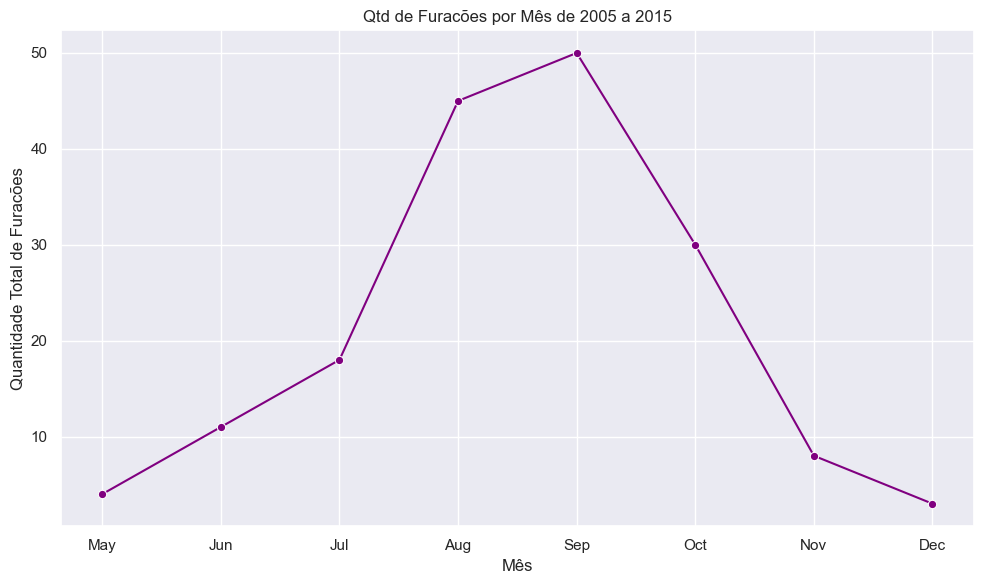

In [10]:
plt.figure(figsize=(10, 6))
sns.set_theme(style="darkgrid")

sns.lineplot(data=df_huricane, x='Month', y='Total', marker='o', color='purple')

plt.title('Qtd de Furacões por Mês de 2005 a 2015')
plt.xlabel('Mês')
plt.ylabel('Quantidade Total de Furacões')
plt.grid(True)
plt.tight_layout()  # Ajusta o layout para evitar corte de texto

Observa-se que os meses com mais furacões, durante os anos, são agosto e setembro.

In [11]:
df_long = pd.melt(df_huricane, id_vars=['Month'], value_vars=['2005', '2006', '2007', '2008', '2009','2010', '2011',
                                                     '2012', '2013','2014', '2015'],
                  var_name='Year', value_name='Hurricanes')
df_long.head()

,Month,Year,Hurricanes
0,May,2005,0
1,Jun,2005,2
2,Jul,2005,5
3,Aug,2005,6
4,Sep,2005,6


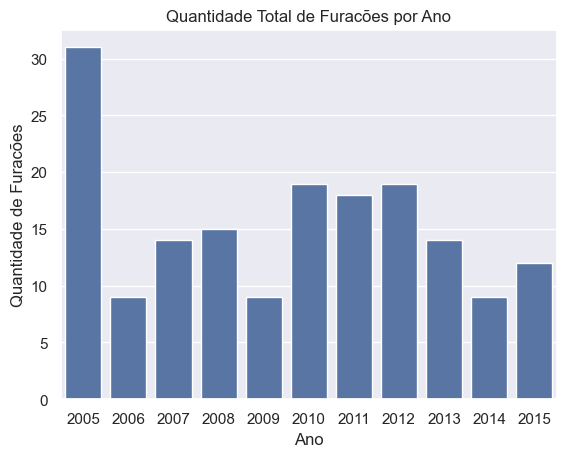

In [12]:
df_ano = df_long.groupby('Year')['Hurricanes'].sum().reset_index()

# Criando o gráfico de barras
sns.barplot(x='Year', y='Hurricanes', data=df_ano)

plt.title('Quantidade Total de Furacões por Ano')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Furacões')

plt.show()

Destaca-se que o ano de 2005 foi o que teve mais furacões.

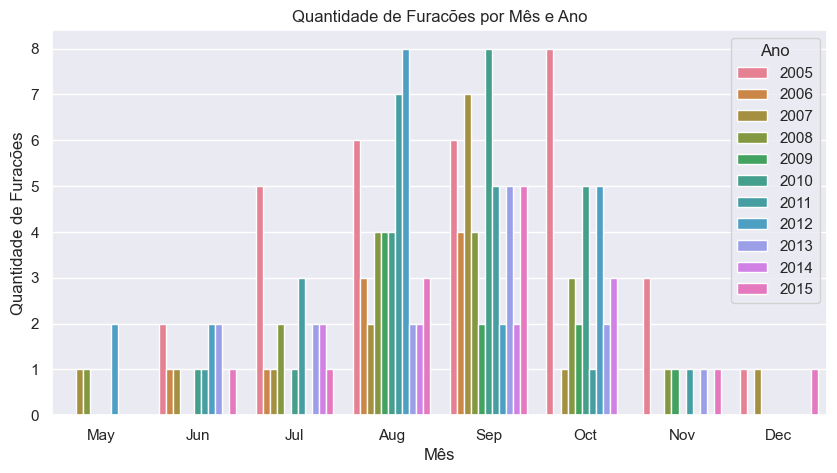

In [13]:
plt.figure(figsize=(10, 5))
# Criando um gráfico de barras agrupadas por ano e mês
sns.barplot(x='Month', y='Hurricanes', hue='Year', data=df_long)

# Personalizando o gráfico
plt.title('Quantidade de Furacões por Mês e Ano')
plt.xlabel('Mês')
plt.ylabel('Quantidade de Furacões')
plt.legend(title='Ano')

plt.show()

Outra forma de demonstrar a quantidade de furacões agrupando por mês e ano, destacando a presença de furacão em todos os anos nos meses de agosto e setembro e ressaltando uma constante de furacões desde julho até dezembro no ano de 2005;